# Missing Value Imputation Using MICE

## Import  library 

In [364]:
import pandas as pd
print(pd.__version__)

1.4.2


## Read Data

In [365]:
Employee  = pd.read_csv("Test.csv")

## Preview data

In [366]:
Employee.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [367]:
type(Employee)

pandas.core.frame.DataFrame

## Perbedaan `info` dan `dtypes`

- info 
memberikan informasi umum tentang DataFrame, seperti jumlah baris dan kolom, nama kolom, tipe data dari setiap kolom, dan jumlah memory yang digunakan.

- dytpes
memberikan tipe data dari setiap kolom dalam bentuk Series. Ini memberikan informasi lebih terperinci dari "info" tentang tipe data dari setiap kolom.

## Inspect data

In [368]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        2839 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            2948 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  2997 non-null   float

Tipe data Pandas:
- int64: integer (bilangan bulat, tanpa koma)
- float64: bilangan desimal (berkoma)
- object: text (string)
- category: kategorikal

## Cek tipe data

In [369]:
Employee.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
dtype: object

## Types of Missing Value

- Missing completely at random(MCAR)
    Penyebab missing value tidak tergantung pada variabel apapun
    Tidak ada satu pun kolom dari dataset yang mampu menjelaskan data yang hilang
    Contoh: Kesalahan entri data saat menginput data, malfungsi peralatan, kehilangan sampel
    
- Missing at random(MAR)
    Penyebab missing value tidak tergantung pada variabel yang nilainya hilang, melainkan bergantung pada variabel lain dari kumpulan data
    Kolom lain dari dataset mampu menjelaskan data yang hilang
    Contoh: responden dalam golongan umur tertentu cenderung tidak melaporkan pendapatan

- Missing not at random(MNAR)
    Penyebab missing value bergantung pada variabel yang hilang itu sendiri
    Kolom lain dari dataset tidak mampu menjelaskan data yang hilang
    Contoh: responden dengan pendapatan tinggi cenderung tidak melaporkan pendapatan

## Check Missing Value

Metode yang paling umum digunakan untuk melihat missing value adalah:
- .isna() : mengembalikan True apabila missing
- .notna() : mengembalikan True apabila tidak missing

In [370]:
Employee.isna()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2996,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [371]:
Employee.notna()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2996,True,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2997,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
2998,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [372]:
Employee.isna().sum()/len(Employee)*100

Employee_ID                  0.000000
Gender                       0.000000
Age                          5.366667
Education_Level              0.000000
Relationship_Status          0.000000
Hometown                     0.000000
Unit                         0.000000
Decision_skill_possess       0.000000
Time_of_service              1.733333
Time_since_promotion         0.000000
growth_rate                  0.000000
Travel_Rate                  0.000000
Post_Level                   0.000000
Pay_Scale                    0.100000
Compensation_and_Benefits    0.000000
Work_Life_balance            0.166667
VAR1                         0.000000
VAR2                         7.233333
VAR3                         0.000000
VAR4                         9.933333
VAR5                         0.000000
VAR6                         0.000000
VAR7                         0.000000
dtype: float64

Dari data di atas kita mempunyai missing value di antaranya

- Age = 5.366667
- Time_of_service = 1.733333            
- Work_Life_balance = 0.166667           
- VAR2 = 7.233333
- VAR4 = 9.933333                       

## Kapan kita menggunakan isna() atau notna()
- isna() biasanya digunakan bersamaan dengan method .sum() yang tujuannya untuk menghitung jumlah missing value pada tiap kolom
- notna() biasanya digunakan bersama metode subseting yang tujuannya untuk mensubset data yang salah satu/beberapa kolom tidak boleh ada missing value

## Treatment Missing Values

Treatment Missing Values
1. Tetap mempertahankan data kita
2. Hapus baris atau kolom: Menggunakan metode dropna() dengan ambang batas yang wajar untuk menghapus setiap baris yang berisi nilai missing, NA < 5%
3. Imputasi nilai NA dengan sebuah nilai

Hapus Baris yang NA
1. .dropna(how='any'): hapus baris apabila memiliki minimal 1 kolom nilai missing value
2. .dropna(how='all'): harus baris apabila memiliki semua kolom nilai missing
3. .dropna(thresh=...): hapus baris apabila nilai non-missing < thresh

In [373]:
Employee.shape

(3000, 23)

Dari hasil shape kita mempunyai data 3000 baris dan 23 kolom yang belum di bersihkan(masih ada missing value)

In [374]:
Employee.dropna(how = 'any').shape #default: any

(2321, 23)

Kita mencoba menggunakan any dan mendapatkan hasil 2341 baris dan 23 kolom yang tersisah

In [375]:
Employee.dropna(how = 'all').shape

(3000, 23)

Kita mencoba menggunakan all , ternyata tidak merubah data sama sekali karena all tidak akan bekerja jika menghapus baris apabila memiliki semua kolom bernilai missing

## Missing Value Imputation

Missing Value Imputasi (MVI) adalah metode solusi yang paling umum digunakan untuk menangani masalah dataset yang tidak lengkap. Secara umum, MVI adalah proses untuk menangani missing value dimana pengganti missing value ditemukan melalui teknik statistik atau pembelajaran mesin. Namun, batasan utama penggunaan imputasi statistik dengan ukuran tendensi sentral adalah bahwa hal itu mengarah pada perkiraan varians dan kovarians yang bias. Oleh karena itu, teknik dengan pembelajaran mesin muncul sebagai alternatif lain untuk mengatasi kelemahan metode statistik. Salah satu algoritma machine learning dalam teknik imputasi adalah MICE.

Kita akan melakukan imputasi terhadap data yang mengandung missing value, menggunakan metode .fillna()

TIPS UNTUK IMPUTASI:

Untuk kolom numerik:

- Isi menggunakan pusat data seperti mean atau median
- Isi menggunakan model prediktif (regresi)

Untuk kolom kategorikal:

- Menggunakan NA sebagai salah satu dari kategori
- Isi menggunakan pusat data (mode/modus)
- Isi menggunakan model prediktif (klasifikasi)

Untuk kolom datetime:

- Menggunakan metode bfill: melakukan imputasi dari baris bawah ke atas
- Menggunakan metode ffill: melakukan imputasi dari baris atas ke bawah

In [376]:
Employee.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [377]:
Employee.isna().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

Dari data di atas kita memiliki missing value, mari kita lakukan pembersihan data
- Age(float64)                        
- Time_of_service(float64)
- Pay_Scale(float64)
- Work_Life_balance(float64)
- VAR2(float64)                             
- VAR4(float64)                             

In [378]:
Employee_missing = Employee.copy()

In [379]:
Employee_missing.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [380]:
Employee_missing.isna().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [381]:
Employee_missing.shape

(3000, 23)

In [382]:
# Membersihkan Age
Employee_missing["Age"].fillna(value=Employee_missing["Age"].mean(), inplace = True)

In [383]:
Employee_missing.isna().sum()

Employee_ID                    0
Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [384]:
# Membersihkan Time_of_service
Employee_missing["Time_of_service"].fillna(value=Employee_missing["Time_of_service"].mean(), inplace = True)

In [385]:
Employee_missing.isna().sum()

Employee_ID                    0
Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service                0
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [386]:
# Membersihkan Pay_Scale
Employee_missing["Pay_Scale"].fillna(value=Employee_missing["Pay_Scale"].mean(), inplace = True)

In [387]:
Employee_missing.isna().sum()

Employee_ID                    0
Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service                0
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      0
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [388]:
# Membersihkan Work_Life_balance

In [389]:
Employee_missing["Work_Life_balance"].fillna(value=Employee_missing["Work_Life_balance"].mean(), inplace = True)

In [390]:
Employee_missing.isna().sum()

Employee_ID                    0
Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service                0
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      0
Compensation_and_Benefits      0
Work_Life_balance              0
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [391]:
# Membersihkan VAR2
Employee_missing["VAR2"].fillna(value=Employee_missing["VAR2"].mean(), inplace = True)

In [392]:
Employee_missing.isna().sum()

Employee_ID                    0
Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service                0
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      0
Compensation_and_Benefits      0
Work_Life_balance              0
VAR1                           0
VAR2                           0
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [393]:
# Membersihkan VAR4
Employee_missing["VAR4"].fillna(value=Employee_missing["VAR4"].mean(), inplace = True)

In [394]:
Employee_missing.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [395]:
# check kembali missing value
Employee_missing.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

jadi untuk sekarang semua permasalahan missing value sudah selesai

In [396]:
Employee_missing.tail()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
2995,EID_22547,F,32.000000,3,Single,Franklin,Sales,Directive,3.0,3,...,6.0,type2,2.0,1,-0.1048,0.7075,1.000000,4,7,4
2996,EID_10066,F,39.797816,2,Single,Franklin,Marketing,Conceptual,10.0,2,...,9.0,type2,1.0,3,0.7516,0.7075,3.000000,4,8,3
2997,EID_7126,F,60.000000,4,Single,Lebanon,Logistics,Analytical,35.0,1,...,9.0,type3,3.0,3,-1.8176,-0.4537,1.907476,4,8,4
2998,EID_4929,F,51.000000,1,Married,Springfield,IT,Behavioral,23.0,1,...,6.0,type3,1.0,5,0.7516,-0.4537,2.000000,3,9,2
2999,EID_24750,F,45.000000,1,Single,Franklin,Sales,Directive,12.0,4,...,8.0,type4,4.0,3,0.7516,-0.4537,2.000000,2,8,5


## Statistical imputation using sklearn

Untuk statistical imputation, dapat juga digunakan method SimpleImputer() dari sklearn.

In [397]:
Employee_missing_1 = Employee.copy()

In [398]:
Employee_missing_1.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [399]:
Employee_missing_1.isna().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

Data di atas sudah pernah kita singgung mengenai data apa saja yang mempunyai missing value, berikut ini masing masing data yang memiliki missing value
- Age
- Time_of_service
- Pay_Scale
- Work_Life_balance  
- VAR2
- VAR4  

In [400]:
# mari kita lihat type nya
Employee_missing_1.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
dtype: object

Jenis type data yang ada missing value
- Age(float64)
- Time_of_service(float64)
- Pay_Scale(float64)
- Work_Life_balance(float64)  
- VAR2(float64)
- VAR4(float64) 

In [401]:
# Sekarang cek berapa persen data tersebut memiliki missing value
#Age(float64)
Employee_missing_1["Age"].isna().sum()/len(Employee_missing_1["Age"])*100

5.366666666666667

In [402]:
#Time_of_service(float64)
Employee_missing_1["Time_of_service"].isna().sum()/len(Employee_missing_1["Time_of_service"])*100

1.7333333333333332

In [403]:
#Pay_Scale(float64)
Employee_missing_1["Pay_Scale"].isna().sum()/len(Employee_missing_1["Pay_Scale"])*100

0.1

In [404]:
#Work_Life_balance(float64)  
Employee_missing_1["Work_Life_balance"].isna().sum()/len(Employee_missing_1["Work_Life_balance"])*100

0.16666666666666669

In [405]:
#VAR2(float64)
Employee_missing_1["VAR2"].isna().sum()/len(Employee_missing_1["VAR2"])*100

7.233333333333333

In [406]:
#VAR4(float64) 
Employee_missing_1["VAR2"].isna().sum()/len(Employee_missing_1["VAR2"])*100

7.233333333333333

Jadi bagaimana cara penanganan untuk mising value di atas?
ada 2 cara yaitu menggunakan mean dan median

berikut ini penjelasanya

TIPS UNTUK IMPUTASI:

Untuk kolom numerik:
- Isi menggunakan pusat data seperti mean atau median
- Isi menggunakan model prediktif (regresi)

Untuk kolom kategorikal:
- Menggunakan NA sebagai salah satu dari kategori
- Isi menggunakan pusat data (mode/modus)
- Isi menggunakan model prediktif (klasifikasi)

Di sini saya akan mencontohkan menggunakan Mean

In [407]:
#Sebelum
Employee_missing_1['Time_of_service'].isna().sum()

52

In [408]:
#Time_of_service(float64)
Employee_missing_1["Time_of_service"].fillna(value=Employee_missing_1["Time_of_service"].mean(), inplace = True)

In [409]:
#Sesudah
Employee_missing_1['Time_of_service'].isna().sum()

0

# Statistical imputation using sklearn

In [410]:
Employee_missing_2 = Employee.copy()

In [411]:
Employee_missing_2.isna().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [412]:
# import library
from sklearn.impute import SimpleImputer

In [413]:
#definisikan metode imputer
mean_imputer = SimpleImputer(strategy='mean')

In [414]:
# Sebelum menggunakan SimpleImputer
Employee_missing_2['Time_of_service'].isna().sum()

52

In [415]:
# pengisian dengan mean
Employee_missing_2['Time_of_service'] = mean_imputer.fit_transform(Employee_missing_2['Time_of_service'].values.reshape(-1,1))

In [416]:
# Sesudah menggunakan SimpleImputer
Employee_missing_2['Time_of_service'].isna().sum()

0

# Multiple Imputation by Chained Equations (MICE)

## Read Data

In [417]:
Employe2 = pd.read_csv('Test2.csv')

In [418]:
Employe2.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [419]:
Employe2.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
dtype: object

##  Check Correlation
Pemeriksaan nilai korelasi dilakukan untuk melihat seberapa kuat hubungan antar kolom. Untuk menjawab apakah suatu kolom dapat dijelaskan oleh nilai di kolom lain.

Nilai berkisar antara -1.0 dan 1.0. Korelasi sebesar -1,0 menunjukkan korelasi negatif sempurna, sedangkan korelasi sebesar 1,0 menunjukkan korelasi positif sempurna. Korelasi sebesar 0,0 menunjukkan tidak ada hubungan linier antara pergerakan kedua variabel.

<AxesSubplot:>

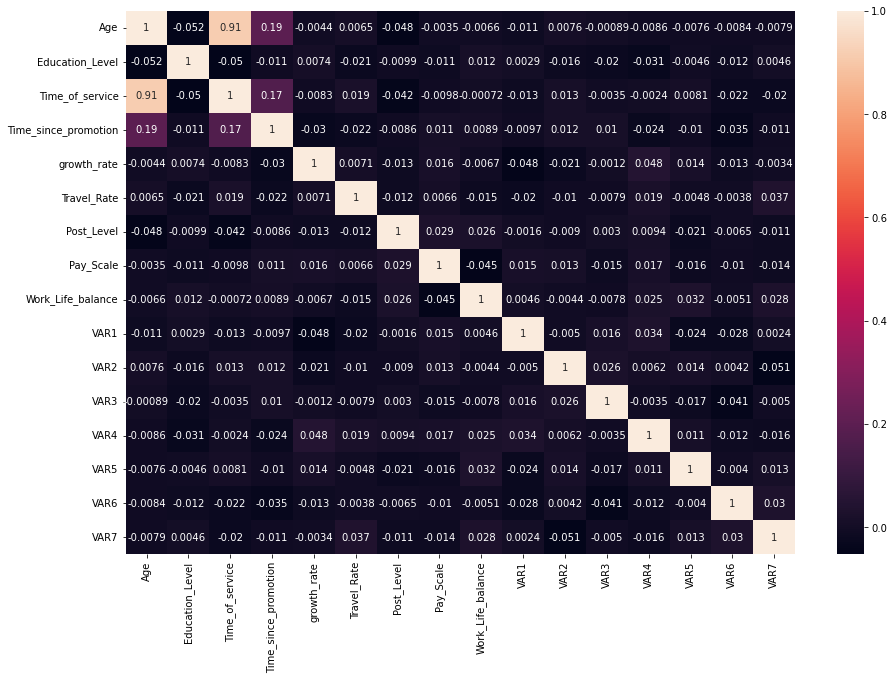

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

#Correlation matrix
Employe2.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(Employe2.corr(), annot = True)

## Check Missing Values

In [421]:
Employe2.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [422]:
Employe2.isnull().sum()/len(Employe2)

Employee_ID                  0.000000
Gender                       0.000000
Age                          0.053667
Education_Level              0.000000
Relationship_Status          0.000000
Hometown                     0.000000
Unit                         0.000000
Decision_skill_possess       0.000000
Time_of_service              0.017333
Time_since_promotion         0.000000
growth_rate                  0.000000
Travel_Rate                  0.000000
Post_Level                   0.000000
Pay_Scale                    0.001000
Compensation_and_Benefits    0.000000
Work_Life_balance            0.001667
VAR1                         0.000000
VAR2                         0.072333
VAR3                         0.000000
VAR4                         0.099333
VAR5                         0.000000
VAR6                         0.000000
VAR7                         0.000000
dtype: float64

Secara keseluruhan, persentase setiap kolom yang dipilih memiliki nilai yang hilang sekitar 30%.

## Imputation

Proyek ini akan melakukan imputasi dengan 2 teknik, yaitu Statistik dan MICE.

<AxesSubplot:ylabel='Frequency'>

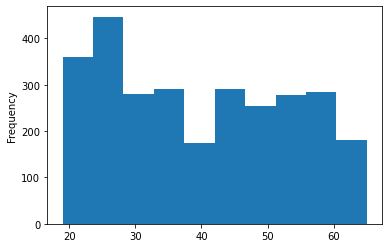

In [423]:
# check distribution of `Age`
Employe2['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

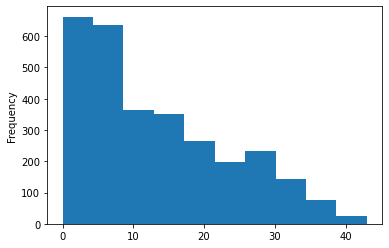

In [424]:
# check distribution of `Time_of_service`
Employe2['Time_of_service'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

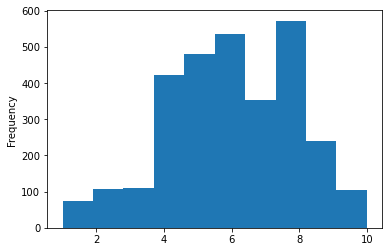

In [425]:
# check distribution of `Pay_Scale`
Employe2['Pay_Scale'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

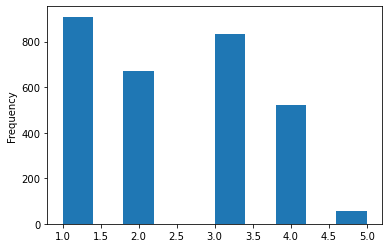

In [426]:
# check distribution of `Work_Life_balance`
Employe2['Work_Life_balance'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

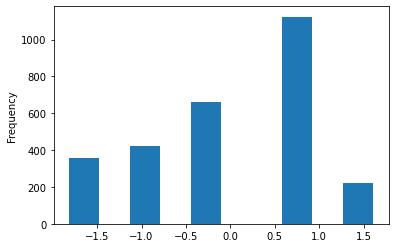

In [427]:
# check distribution of `VAR2`
Employe2['VAR2'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

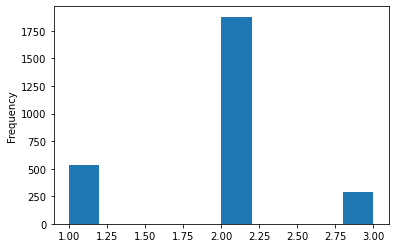

In [428]:
# check distribution of `VAR4`
Employe2['VAR4'].plot(kind='hist')

In [479]:
obesity_stats = pd.read_csv('Hitters.csv')

In [480]:
obesity_stats.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [431]:
mean_imputer = SimpleImputer(strategy='mean')

In [481]:
# convert NA
obesity_stats['Salary'] = mean_imputer.fit_transform(obesity_stats['Salary'].values.reshape(-1,1))

In [482]:
obesity_stats.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

Insight: Metode statistical sudah berhasil mengisi ketiga kolom yang missing.

# Implement MICE

In [461]:
# Copy data to obesity_mice
# obesity_mice = Employee.copy()
obesity_mice = pd.read_csv('Hitters.csv')

In [462]:
obesity_mice.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [463]:
obesity_mice.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [464]:
obesity_mice = obesity_mice.drop(columns=['League','Division','NewLeague'])

In [465]:
obesity_mice.dtypes

AtBat        int64
Hits         int64
HmRun        int64
Runs         int64
RBI          int64
Walks        int64
Years        int64
CAtBat       int64
CHits        int64
CHmRun       int64
CRuns        int64
CRBI         int64
CWalks       int64
PutOuts      int64
Assists      int64
Errors       int64
Salary     float64
dtype: object

In [466]:
obesity_mice.shape

(322, 17)

In [467]:
obesity_mice.isna().sum()

AtBat       0
Hits        0
HmRun       0
Runs        0
RBI         0
Walks       0
Years       0
CAtBat      0
CHits       0
CHmRun      0
CRuns       0
CRBI        0
CWalks      0
PutOuts     0
Assists     0
Errors      0
Salary     59
dtype: int64

In [468]:
# import library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputing with MICE
# Initialize IterativeImputer
mice_imputer = IterativeImputer()

In [469]:
# Impute using fit_tranform on data
obesity_mice = pd.DataFrame(mice_imputer.fit_transform(obesity_mice), columns=obesity_mice.columns)

In [470]:
obesity_mice['Salary'] = round(obesity_mice['Salary'])

Checking for missing values after imputing with MICE method:

In [471]:
# check missing value after imputation
obesity_mice.isnull().sum()

AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64

In [472]:
obesity_mice.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,286.0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,92.0


In [473]:
data_full = obesity_mice.copy()

Insight: MICE sudah berhasil mengisi kolom yang missing

## Check Performance 

In order to examine the performance of the imputation method, this project is using the **MSE** and **RMSE** values for numeric prediction, and **Accuracy** for category prediction. 

### MSE and RMSE
The Mean Squared Error (MSE) and the Root Mean Square Error (RMSE) are the standard statistical metrics used to evaluate models [(Ref)](https://gmd.copernicus.org/articles/7/1247/2014/).

- Mean Squared Error (MSE) is the average squared error between the actual value and the forecast value.
- Root Mean Square Error (RMSE) is the magnitude of the prediction error rate.

**MSE formula:**

$$
    MSE = \frac {1}{n} \sum^{n}_{i=1} (y_i - \hat{y_i})^2
$$

**RMSE formula:**

$$
    RMSE = \sqrt {\sum^{n}_{i=1} \frac {(y_i - \hat{y_i})^2} {n}}
$$

- $MSE$ = mean square error
- $RMSE$ = root mean square error
- $y$ = observed value
- $\hat{y_i}$= predicted result value
- $i$ = order of data in database
- $n$ = number of data

MSE and RMSE values are getting smaller and closer to 0 indicating more accurate prediction results.

Calculating MSE and RMSE values can be executed using the `sklearn.metrics` library which has a `mean_squared_error` function with a squared kwarg (defaults to `True`). Setting squared to `False` will return the `RMSE`.

### Accuracy

Accuracy is a metric that summarizes the performance of a classification or prediction model as the number of correct predictions divided by the total number of predictions. Measurements based on accuracy are more suitable and commonly used for assesing the prediction or imputation for categorical data [(Ref)](https://www.researchgate.net/publication/319251235_Performance_Analysis_of_Various_Missing_Value_Imputation_Methods_on_Heart_Failure_Dataset). Accuracy of 1 indicates a perfect accuracy, whereas the accuracy of 0 indicates a random guess.


**Accuracy Formula:**

$$
    Accuracy = \frac {Number of Correct Prediction} {Total Number of Predictions}
$$

Calculating accuracy scores can be executed using the `sklearn.metrics` library which has a `accuracy_score`.

## Check Performance for Statistical Imputation

In [483]:
from sklearn.metrics import mean_squared_error

#performance imputation for Salary
# mse
print(mean_squared_error(y_true = data_full.Salary, y_pred = obesity_stats.Salary))
# rmse
print(mean_squared_error(y_true = data_full.Salary, y_pred = obesity_stats.Salary, squared=False))

20374.566386117833
142.73950534493886


In [497]:
from sklearn.metrics import accuracy_score

# Eror Classification metrics can't handle a mix of multiclass and continuous targets
# performance imputation for Salary
# accuracy_score(data_full['Salary'], obesity_mice['Salary'])

## Check Performance MICE

In [484]:
#performance imputation for Salary
print(mean_squared_error(y_true = data_full.Salary, y_pred = obesity_mice.Salary))
print(mean_squared_error(y_true = data_full.Salary, y_pred = obesity_mice.Salary, squared=False))

0.0
0.0


In [487]:
#performance imputation for Salary
from sklearn.metrics import accuracy_score

# performance imputation for Salary
accuracy_score(data_full['Salary'], obesity_mice['Salary'])

1.0